In [1]:
# Develop plots for the publication


In [8]:
from carate.plotting.base_plots import plot_range_band_single, plot_range_band_multi, get_stacked_list

MOLT-4
len of results is 500
dict_keys(['Loss', 'Acc_train', 'Acc_test', 'AUC'])
<class 'list'>


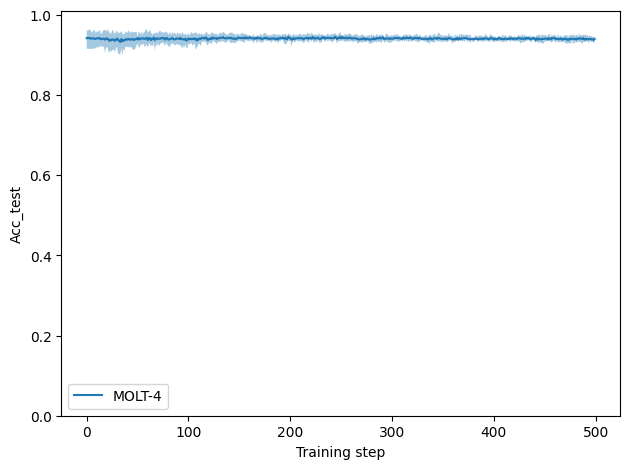

In [3]:
import pandas as pd

path_to_directory = "./data/MOLT-4"
result = get_stacked_list(
        path_to_directory=path_to_directory,
        num_cv=5,
        json_name="MOLT-4.json",
    )
legend_text = path_to_directory.split("/")[-1]
print(legend_text)
print("len of results is", len(result[0]["Loss"]))
print(result[0].keys())
print(type(result))
plot_range_band_single(result, key_val="Acc_test", file_name="ENZYMES_accuracy", save_dir="./plots", alpha=0.4, legend_text=legend_text)

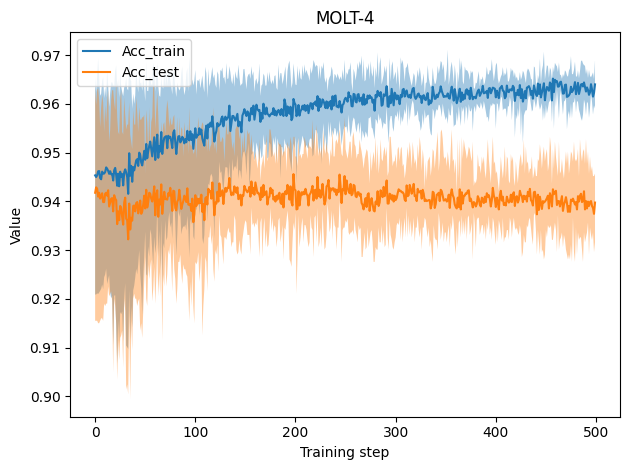

In [4]:
plot_range_band_multi(result, key_vals=["Acc_train", "Acc_test"], file_name=f"{legend_text}_multi_accuracy", save_dir="./plots", alpha=0.4, title_text=legend_text)

data
len of results is 150
dict_keys(['MAE Train', 'MSE Train', 'MAE Test', 'MSE Test'])
<class 'list'>


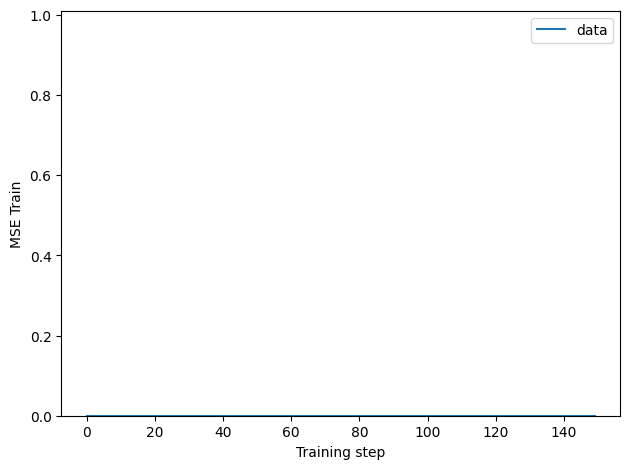

In [48]:
import pandas as pd

path_to_directory = "./data/Regression/ALCHEMY_20_test_training_length_no_norm/data"
result = get_stacked_list(
        path_to_directory=path_to_directory,
        num_cv=5,
        json_name="alchemy_full.json",
    )
legend_text = path_to_directory.split("/")[-1]
print(legend_text)
print("len of results is", len(result[1]["MAE Train"]))
print(result[0].keys())
print(type(result))
plot_range_band_single(result, key_val="MSE Train", file_name="ENZYMES_accuracy", save_dir="./plots", alpha=0.4, legend_text=legend_text)

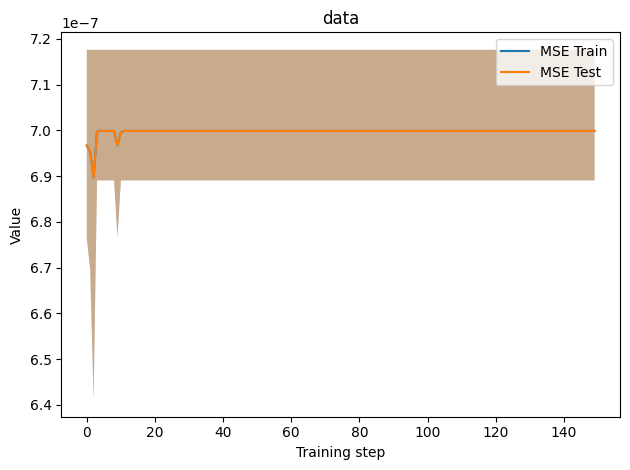

In [49]:
plot_range_band_multi(result, key_vals=["MSE Train", "MSE Test"], file_name=f"{legend_text}_multi_accuracy", save_dir="./plots", alpha=0.4, title_text=legend_text)

# Plott all Classification into single files

In [56]:
from typing import Tuple
import os 
from amarium.utils import append_slash



def plot_runs(base_dir:str, val_single:str="Acc_test", val_multi:Tuple[str]=("Acc_train", "Acc_test"))->None:
    run_dirs = os.listdir(base_dir)

    for run_dir in run_dirs: 
        full_dir = append_slash(base_dir) + append_slash(run_dir) + append_slash("data")
        name = os.listdir(full_dir + append_slash("CV_0"))[0]
        legend_text = full_dir.split("/")[-3]
        print(f"Plotting:{legend_text}")
        result = get_stacked_list(
        path_to_directory=full_dir,
        num_cv=5,
        json_name=name,
        )

        plot_range_band_single(result, key_val=val_single, file_name=f"{legend_text}_accuracy", save_dir="./plots", alpha=0.4, legend_text=legend_text)
        plot_range_band_multi(result, key_vals=val_multi, file_name=f"{legend_text}_multi_accuracy", save_dir="./plots", alpha=0.4, title_text=legend_text)

Plotting:MOLT-4
Plotting:PROTEINS
Plotting:MCF-7
Plotting:ENZYMES
Plotting:YEAST
Plotting:ZINC_20
Plotting:ZINC_20_no_norm
Plotting:ALCHEMY_20_test_training_length_no_norm
Plotting:ALCHEMY_20


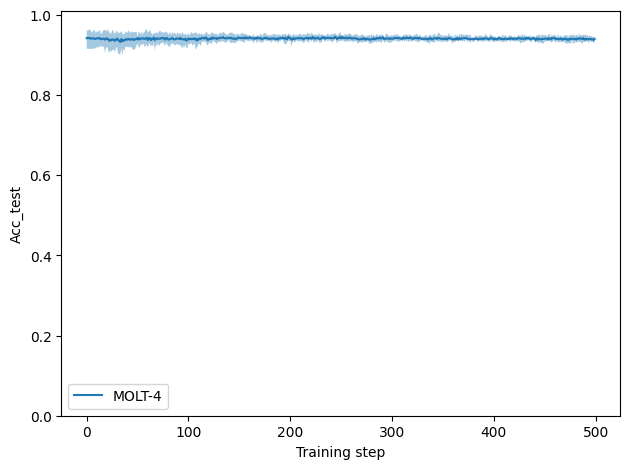

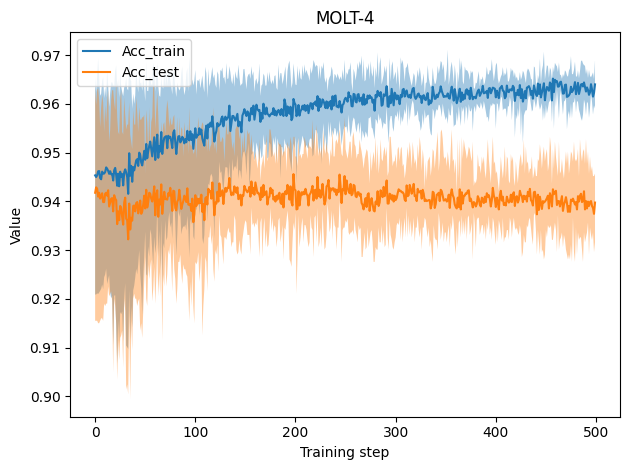

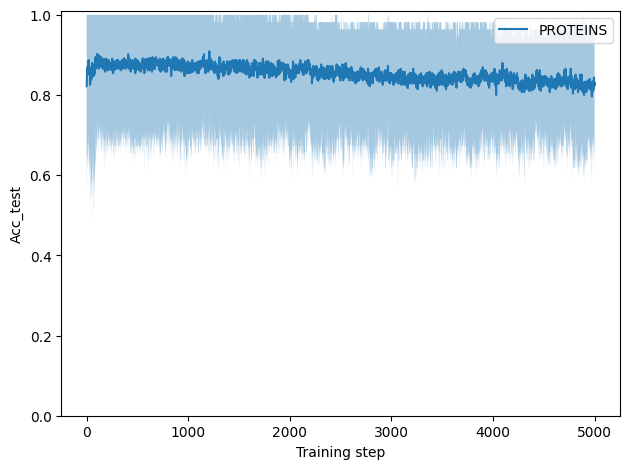

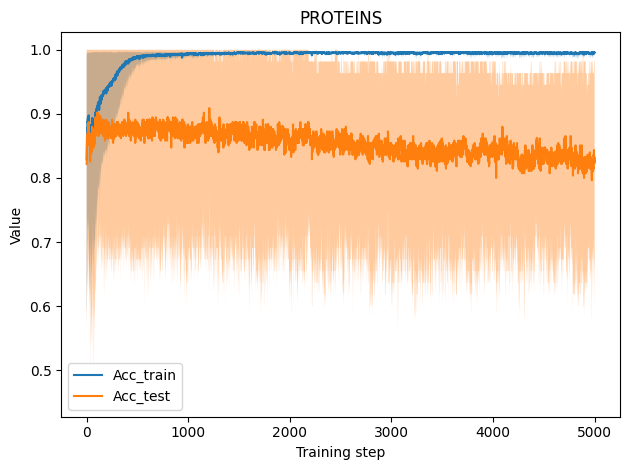

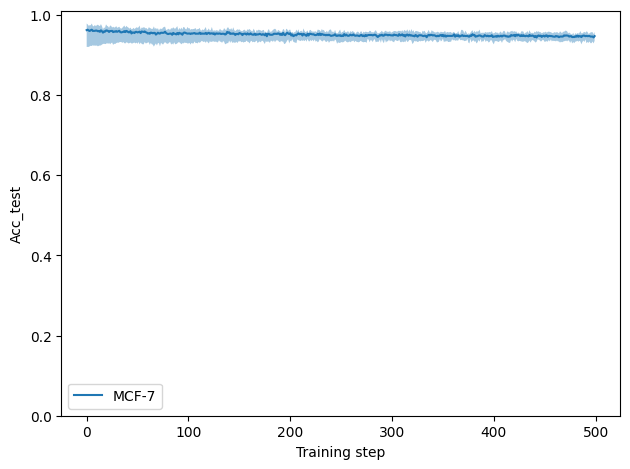

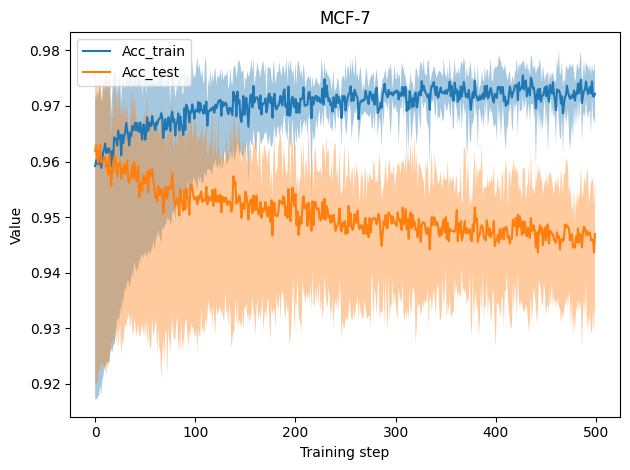

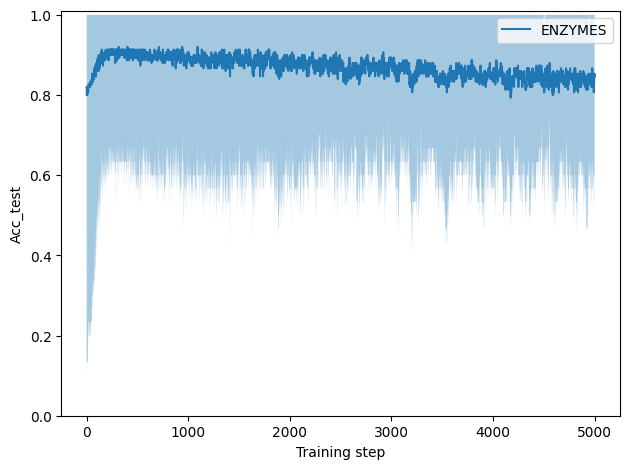

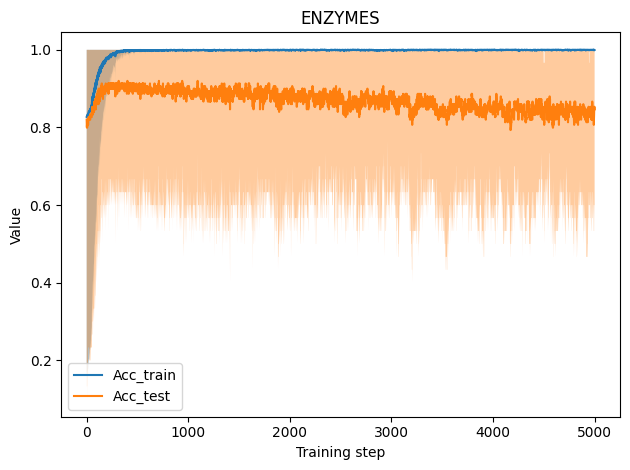

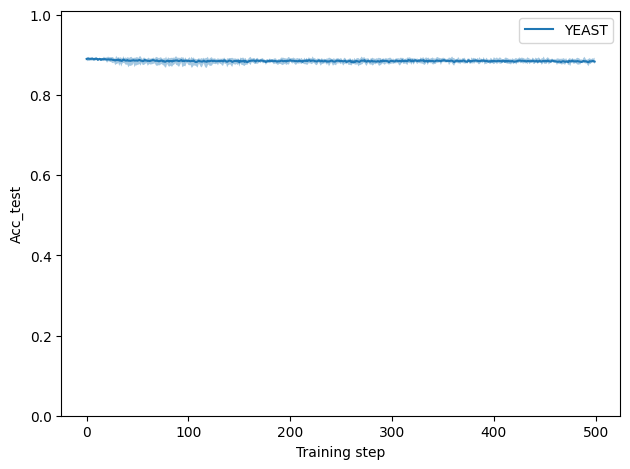

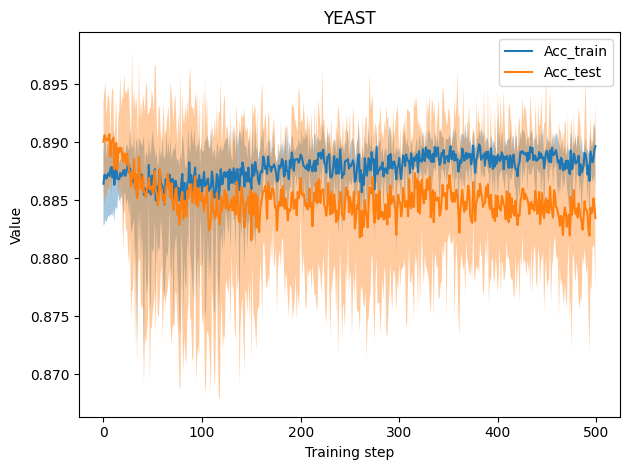

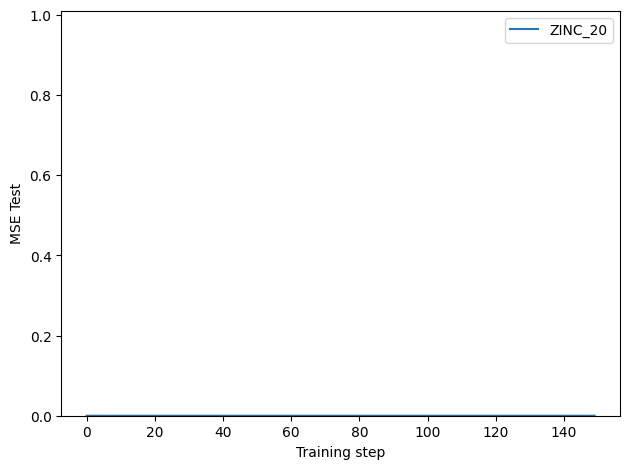

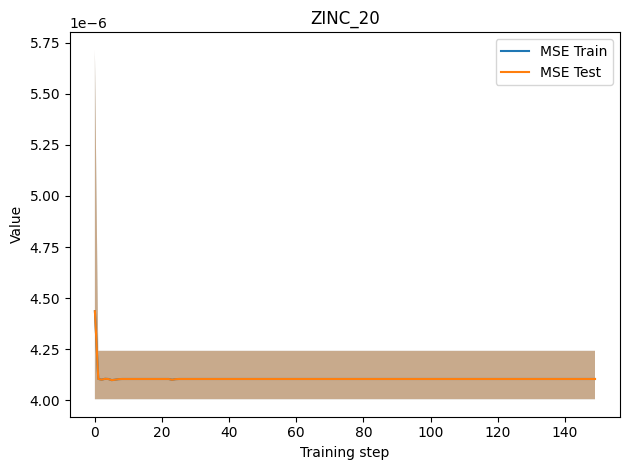

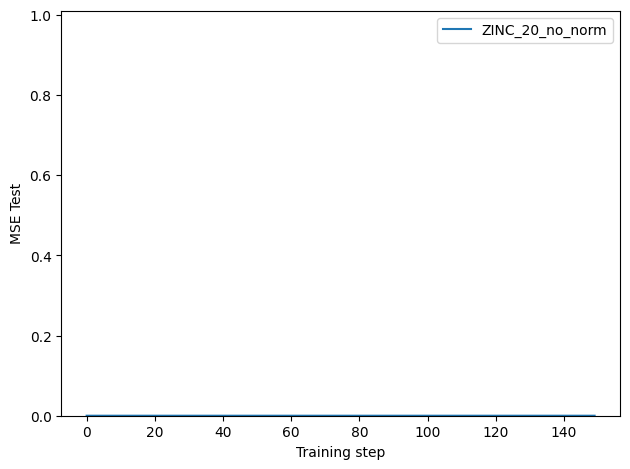

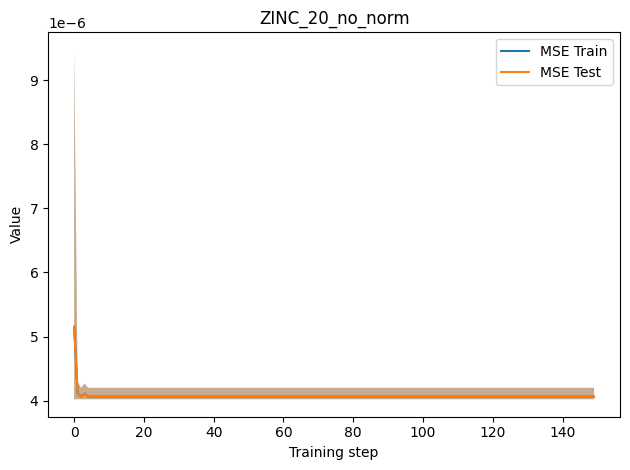

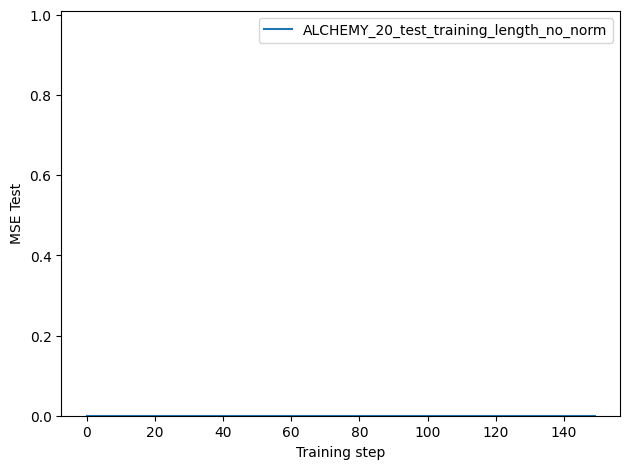

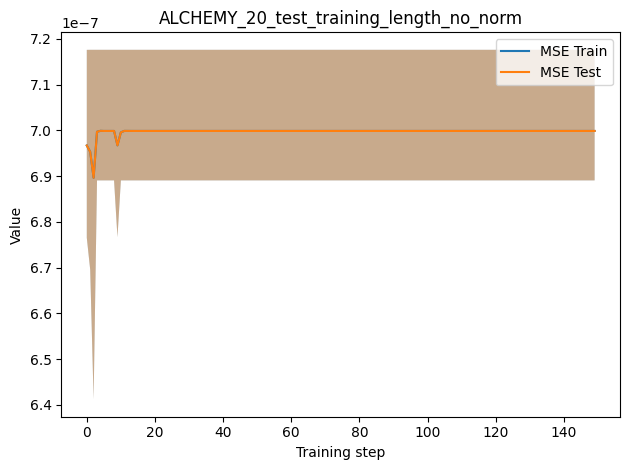

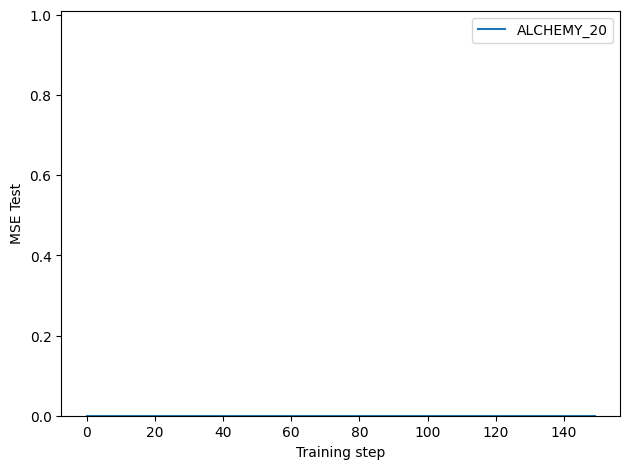

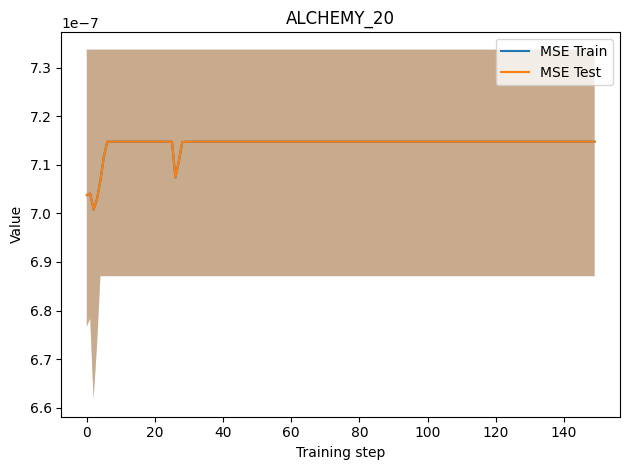

In [61]:

base_dirs= ["./data/Classification", "./data/Regression"]
plot_runs(base_dirs[0])
plot_runs(base_dirs[1], val_single = "MSE Test", val_multi = ["MSE Train", "MSE Test"])